In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.dates import DateFormatter, HourLocator

# Disable Warnings
import warnings
warnings.filterwarnings('ignore')
# Allow Multiple Output per Cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'
# StatsModels for Ordinary Least Squares Regresssion
import statsmodels.api as sm
# Import the adfuller (ADF) Stationarity Test
from statsmodels.tsa.stattools import adfuller
# Import QuantStats for Trading Strategy Tear-Sheets
import quantstats as qs

In [7]:
# All data from binance or binance futures || Base currency is USDT

df_btc = pd.read_csv('candle_bns_btc_usdt_1m_202403011651.csv')
df_eth = pd.read_csv('candle_bns_eth_usdt_1m_202403011652.csv')

df_btc_perp = pd.read_csv('candle_bnf_btc_usdt_perpetual_1m_202403011649.csv') 
df_eth_perp = pd.read_csv('candle_bnf_eth_usdt_perpetual_1m_202403011650.csv')

# Sort dataframes by 'timestamp'
df_btc = df_btc.sort_values(by='timestamp')
df_eth = df_eth.sort_values(by='timestamp')
df_btc_perp = df_btc_perp.sort_values(by='timestamp')
df_eth_perp = df_eth_perp.sort_values(by='timestamp')

### Convert to daily data

In [8]:
def convert_to_daily_data(df_btc):
    # Convert 'timestamp' column to datetime
    df_btc['timestamp'] = pd.to_datetime(df_btc['timestamp'])

    # Group by date and aggregate the data
    daily_df_btc = df_btc.groupby(df_btc['timestamp'].dt.date).agg({
        'open': 'first',
        'close': 'last',
        'low': 'min',
        'high': 'max',
        'volume': 'sum',
        'cont_records': 'sum',
        'quote_volume': 'sum'
    }).reset_index()

    return daily_df_btc

daily_df_btc = convert_to_daily_data(df_btc)
daily_df_eth = convert_to_daily_data(df_eth)
daily_df_btc_perp = convert_to_daily_data(df_btc_perp)
daily_df_eth_perp = convert_to_daily_data(df_eth_perp)

### OPTIONAL --> Processing whole dataset can take time so can you subset initially

In [9]:
# # Comment this section in actual full run 
# # Select relevant columns
# columns_to_select = ['timestamp', 'close', 'volume']  # You can customize this based on your needs

# # Create a common set of timestamps
# common_timestamps = set(df_btc['timestamp']).intersection(df_eth['timestamp'], df_btc_perp['timestamp'], df_eth_perp['timestamp'])

# # Filter dataframes based on common timestamps and keep only relevant columns
# df_btc = df_btc[df_btc['timestamp'].isin(common_timestamps)][columns_to_select].head(100)
# df_eth = df_eth[df_eth['timestamp'].isin(common_timestamps)][columns_to_select].head(100)
# df_btc_perp = df_btc_perp[df_btc_perp['timestamp'].isin(common_timestamps)][columns_to_select].head(100)
# df_eth_perp = df_eth_perp[df_eth_perp['timestamp'].isin(common_timestamps)][columns_to_select].head(100)

### Plotting bitcoin and bitcoin perpetual futures - Closing price

Text(0, 0.5, 'Bitcoin Close Price')

Text(0, 0.5, 'Bitcoin Futures Close Price')

Text(0.5, 1.0, 'Bitcoin vs Bitcoin Perpetual Futures')

(array([19643.14232639, 19790.29864587]),
 [Text(19643.142326387155, 0, '10-13 03:24'),
  Text(19790.298645869792, 0, '03-08 07:10')])

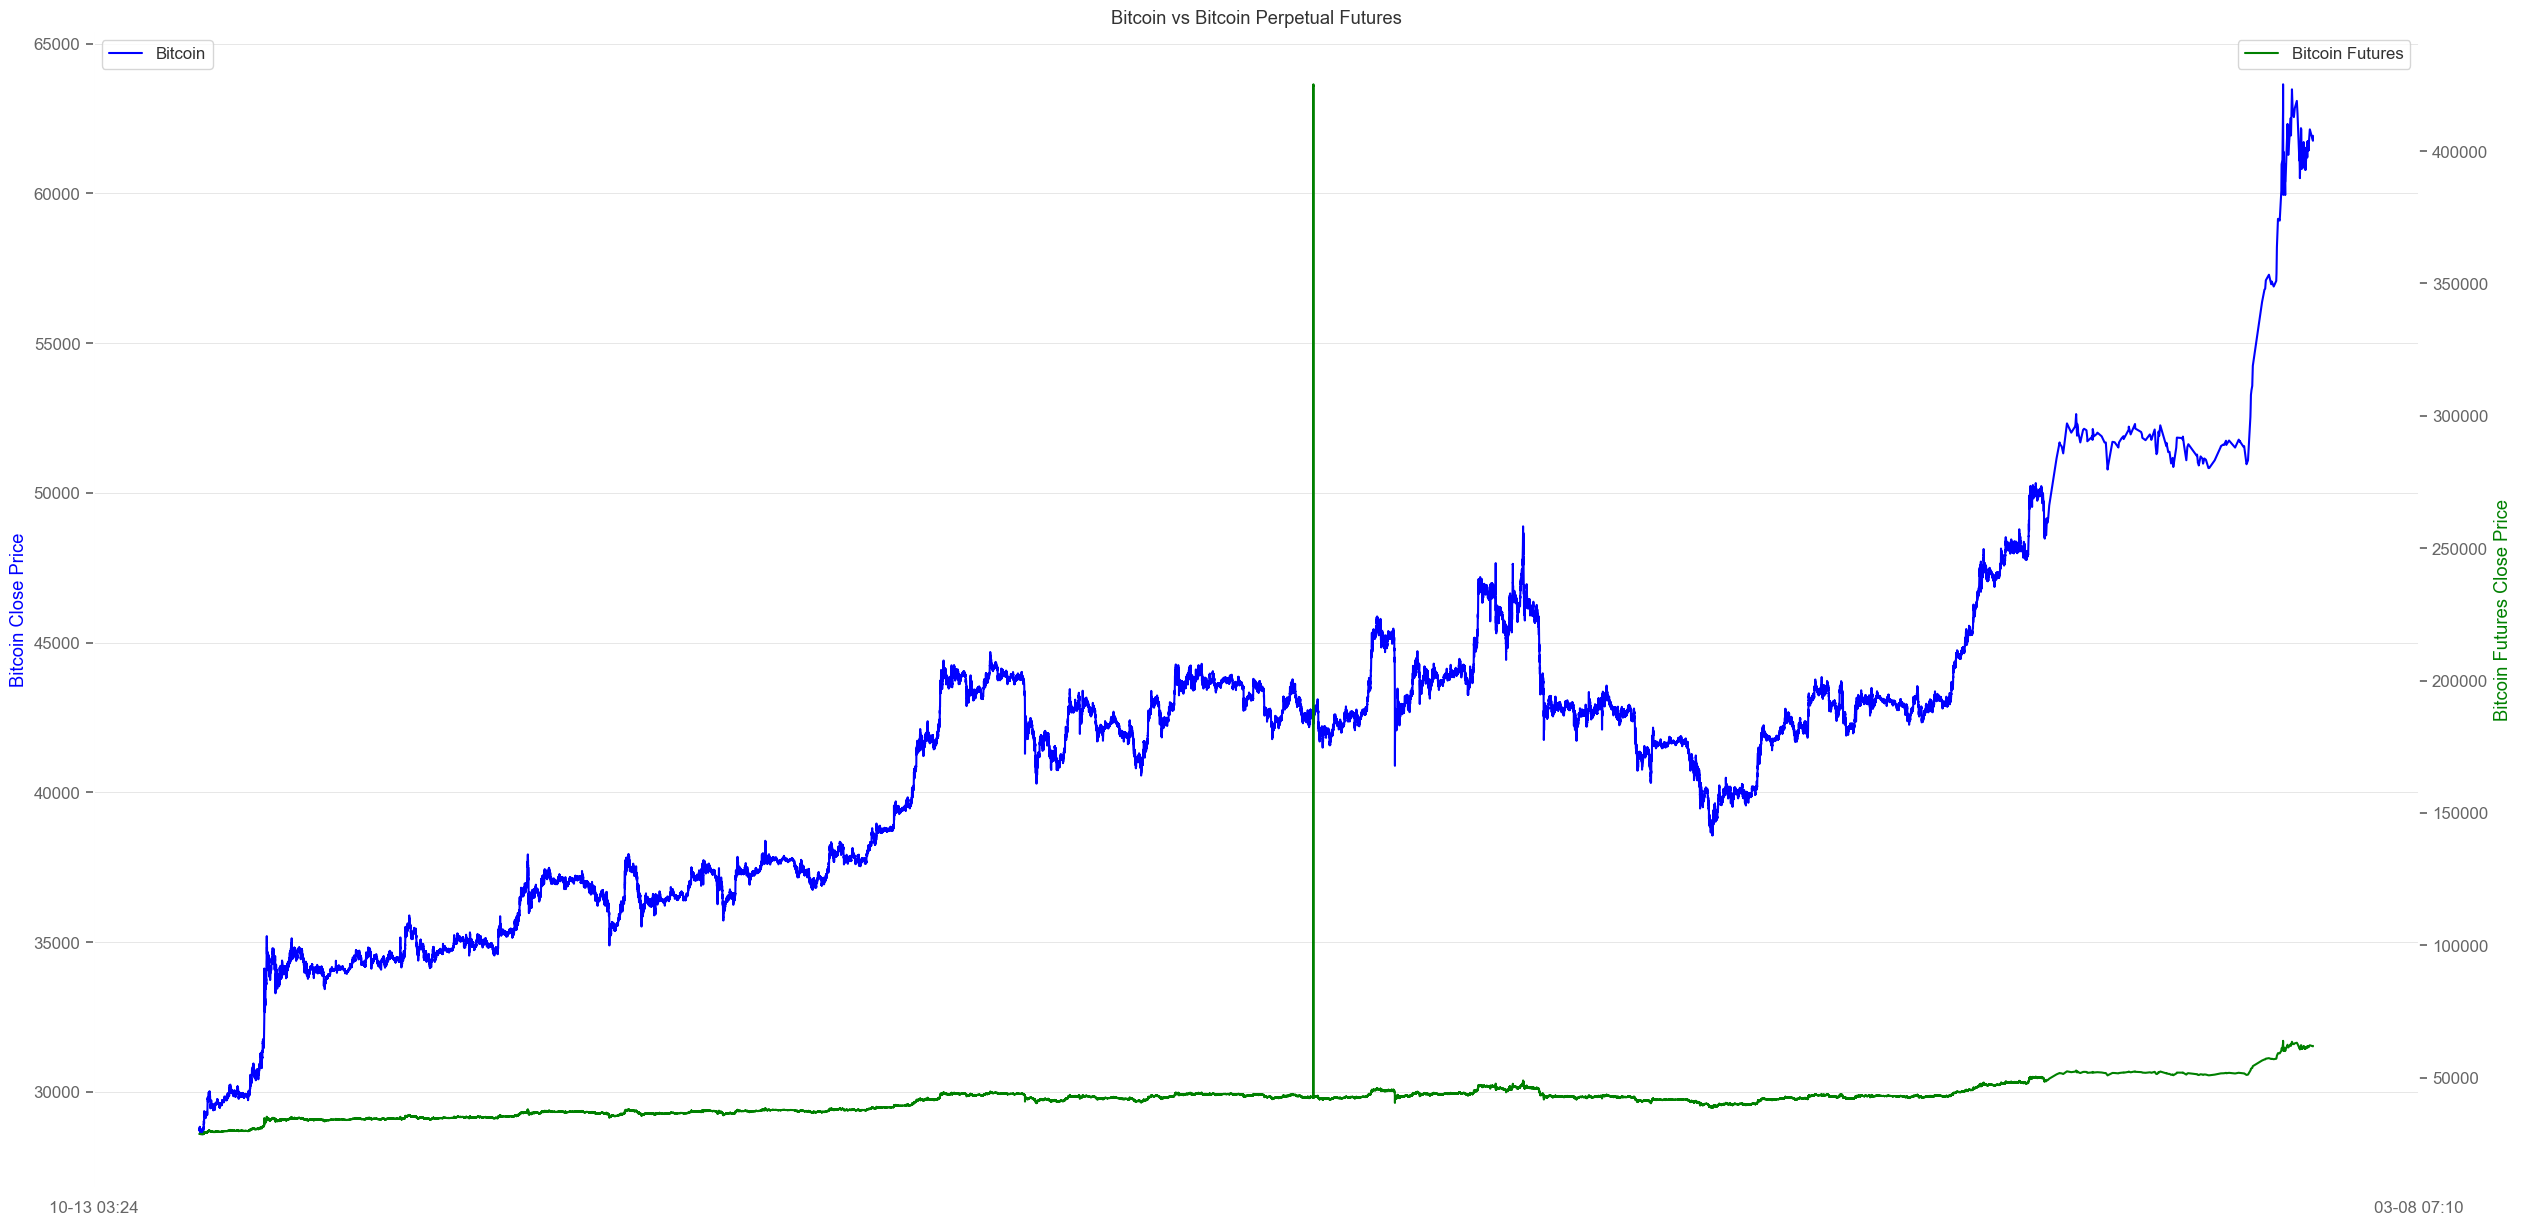

In [10]:

# Extract relevant columns (timestamp and close price)
df1 = df_btc[['timestamp', 'close']]
df2 = df_btc_perp[['timestamp', 'close']]

# Merge datasets on timestamp
merged_df_btc_close = pd.merge(df1, df2, on='timestamp', suffixes=('_bitcoin', '_futures'))

# Plot Market Data
fig, ax = plt.subplots(figsize=(30, 15))

# Plot Bitcoin close price
ax.plot(merged_df_btc_close['timestamp'], merged_df_btc_close['close_bitcoin'], color='blue', label='Bitcoin')

# Create a second y-axis
ax1 = ax.twinx()

# Plot Bitcoin Perpetual Futures close price on the second axis
ax1.plot(merged_df_btc_close['timestamp'], merged_df_btc_close['close_futures'], color='green', label='Bitcoin Futures')

# Format x-axis labels
date_format = DateFormatter('%m-%d %H:%M')
ax.xaxis.set_major_formatter(date_format)
ax.xaxis.set_major_locator(HourLocator(interval=10000))  # Adjust the interval as needed

# Set labels and title
ax.set_ylabel('Bitcoin Close Price', color='blue')
ax1.set_ylabel('Bitcoin Futures Close Price', color='green')
plt.title('Bitcoin vs Bitcoin Perpetual Futures')

# Display a legend
ax.legend(loc='upper left')
ax1.legend(loc='upper right')

plt.xticks(rotation=45, ha='right')
plt.grid()
plt.show()


### Plotting bitcoin and bitcoin perpetual futures - SPREAD

(array([19643.14232639, 19790.29864587]),
 [Text(19643.142326387155, 0, '10-13 03'),
  Text(19790.298645869792, 0, '03-08 07')])

Text(0, 0.5, 'Spread (Bitcoin - Futures)')

Text(0.5, 1.0, 'Bitcoin vs Bitcoin Perpetual Futures Spread')

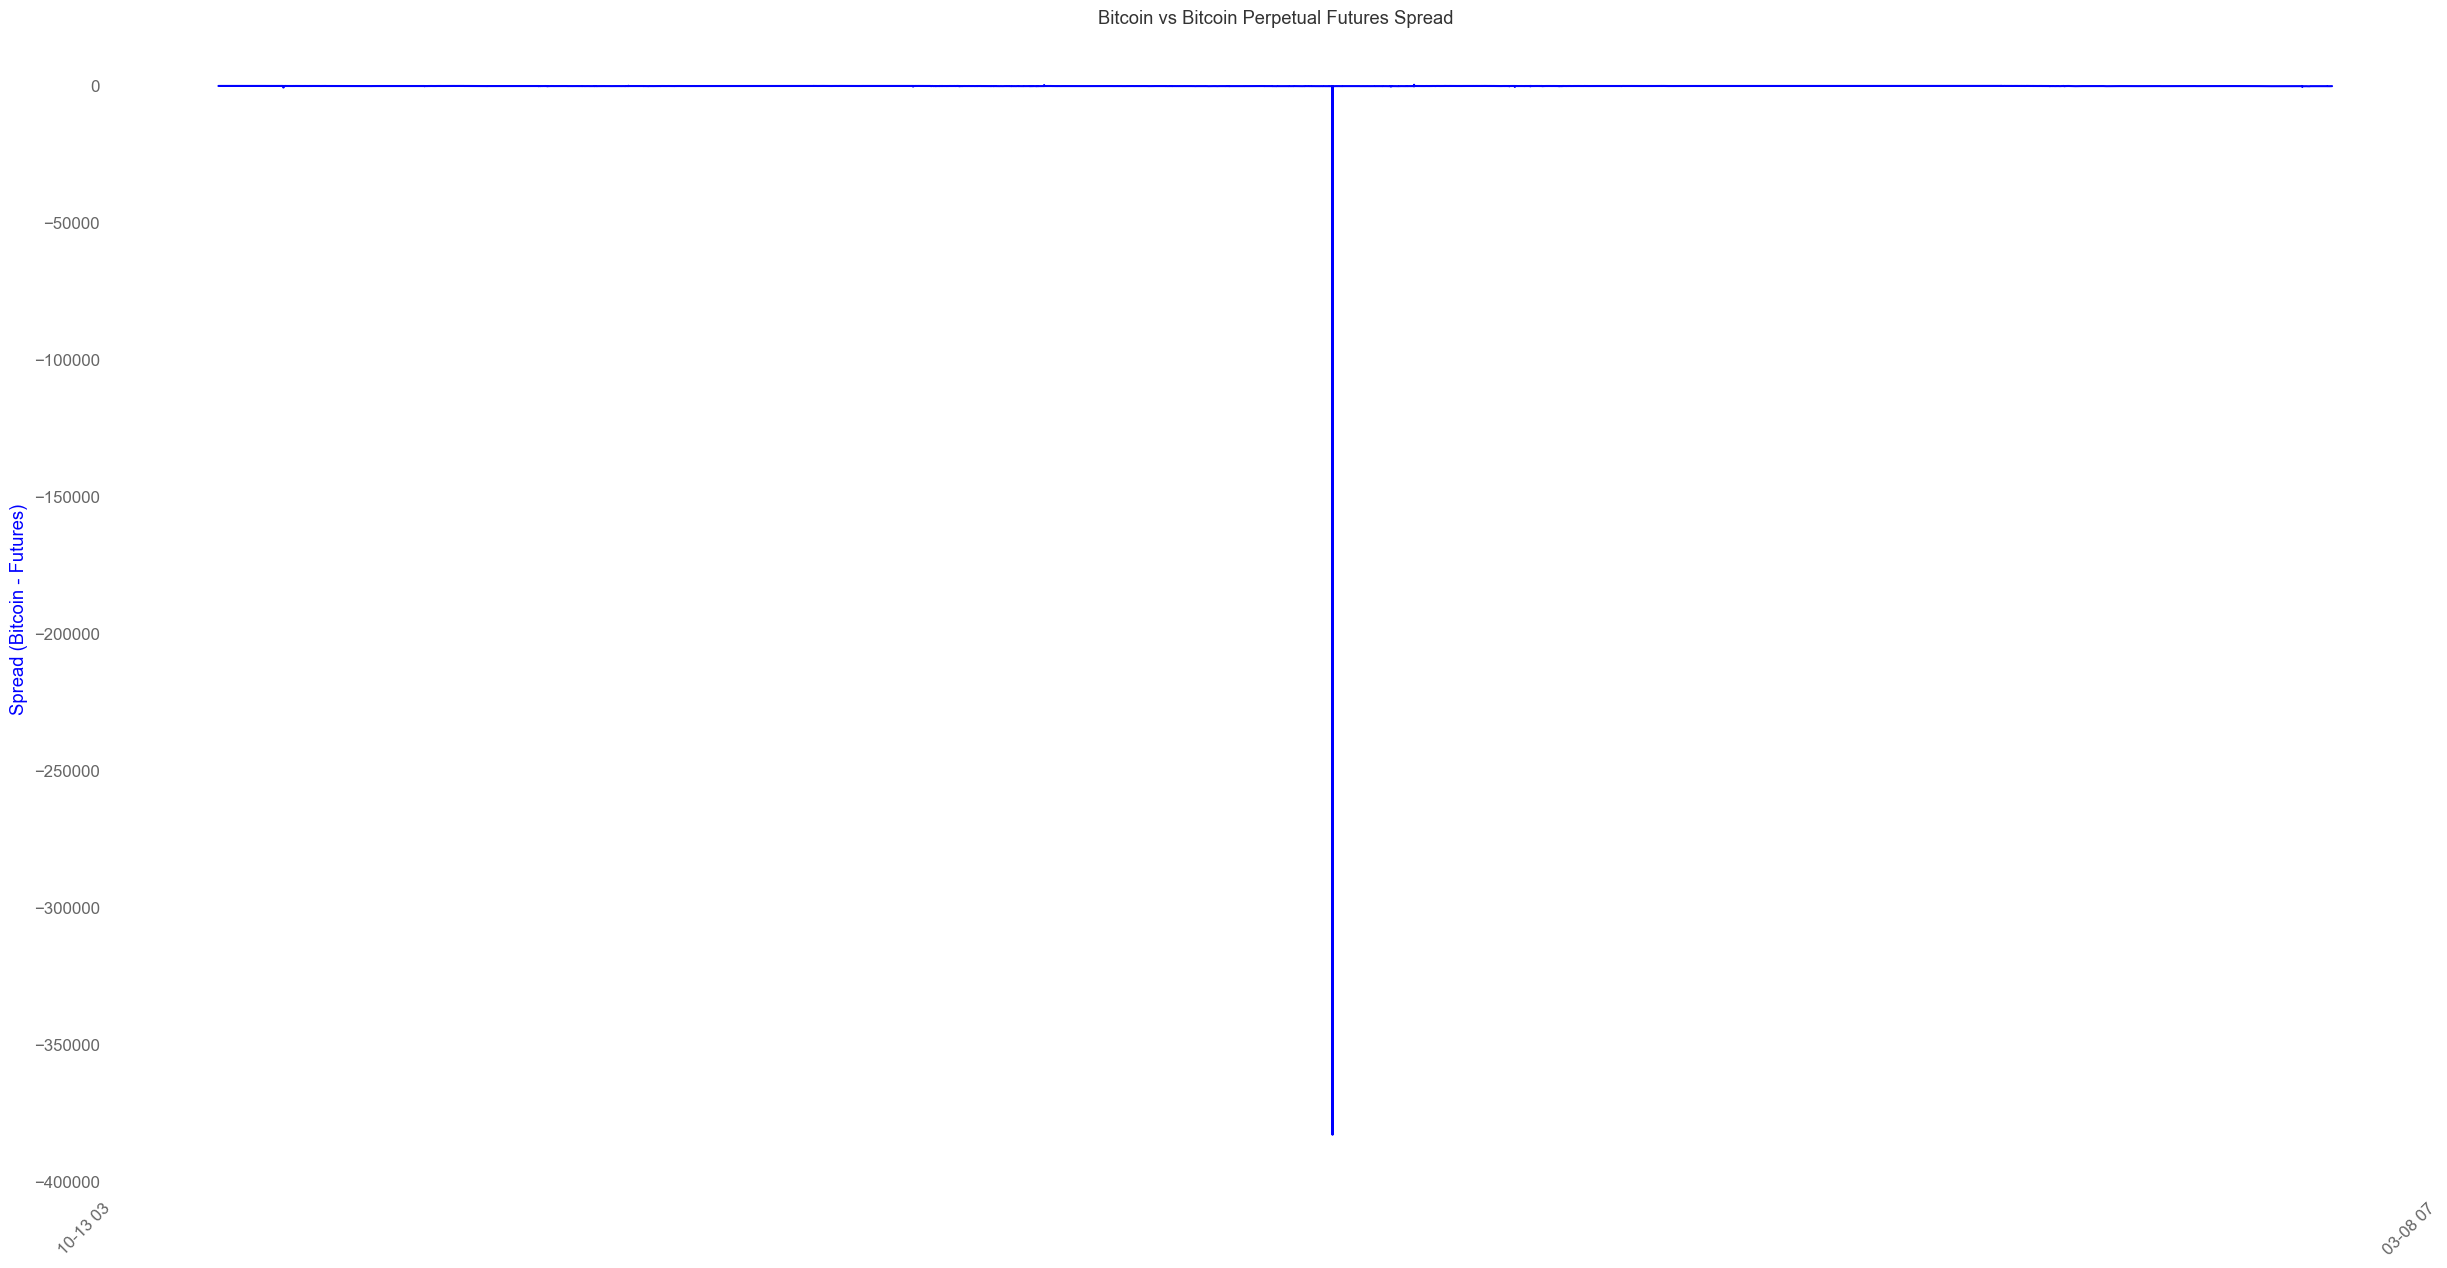

In [11]:
# Extract relevant columns (timestamp and close price)
df1 = df_btc[['timestamp', 'close']]
df2 = df_btc_perp[['timestamp', 'close']]

# Merge datasets on timestamp
merged_df_btc_spread = pd.merge(df1, df2, on='timestamp', suffixes=('_bitcoin', '_futures'))

# Calculate spread (difference between bitcoin and futures close prices)
merged_df_btc_spread['spread'] = merged_df_btc_spread['close_bitcoin'] - merged_df_btc_spread['close_futures']

# Plot Market Data
fig, ax = plt.subplots(figsize=(30,15))
ax.plot(merged_df_btc_spread['timestamp'], merged_df_btc_spread['spread'], color='blue')
#ax.xaxis.set_major_formatter(date_format)
ax.xaxis.set_major_locator(HourLocator(interval=10000))  # Adjust the interval as needed

plt.xticks(rotation=45, ha='right')
plt.ylabel('Spread (Bitcoin - Futures)', color='blue')
plt.grid()
plt.title('Bitcoin vs Bitcoin Perpetual Futures Spread')
plt.show()


### Plotting Ethereum and Ethereum perpetual futures - Closing price

Text(0, 0.5, 'Ethereum Close Price')

Text(0, 0.5, 'Ethereum Futures Close Price')

Text(0.5, 1.0, 'Ethereum vs Ethereum Perpetual Futures')

(array([19643.14440972, 19790.30072917]),
 [Text(19643.144409722223, 0, '10-13 03:27'),
  Text(19790.300729166665, 0, '03-08 07:13')])

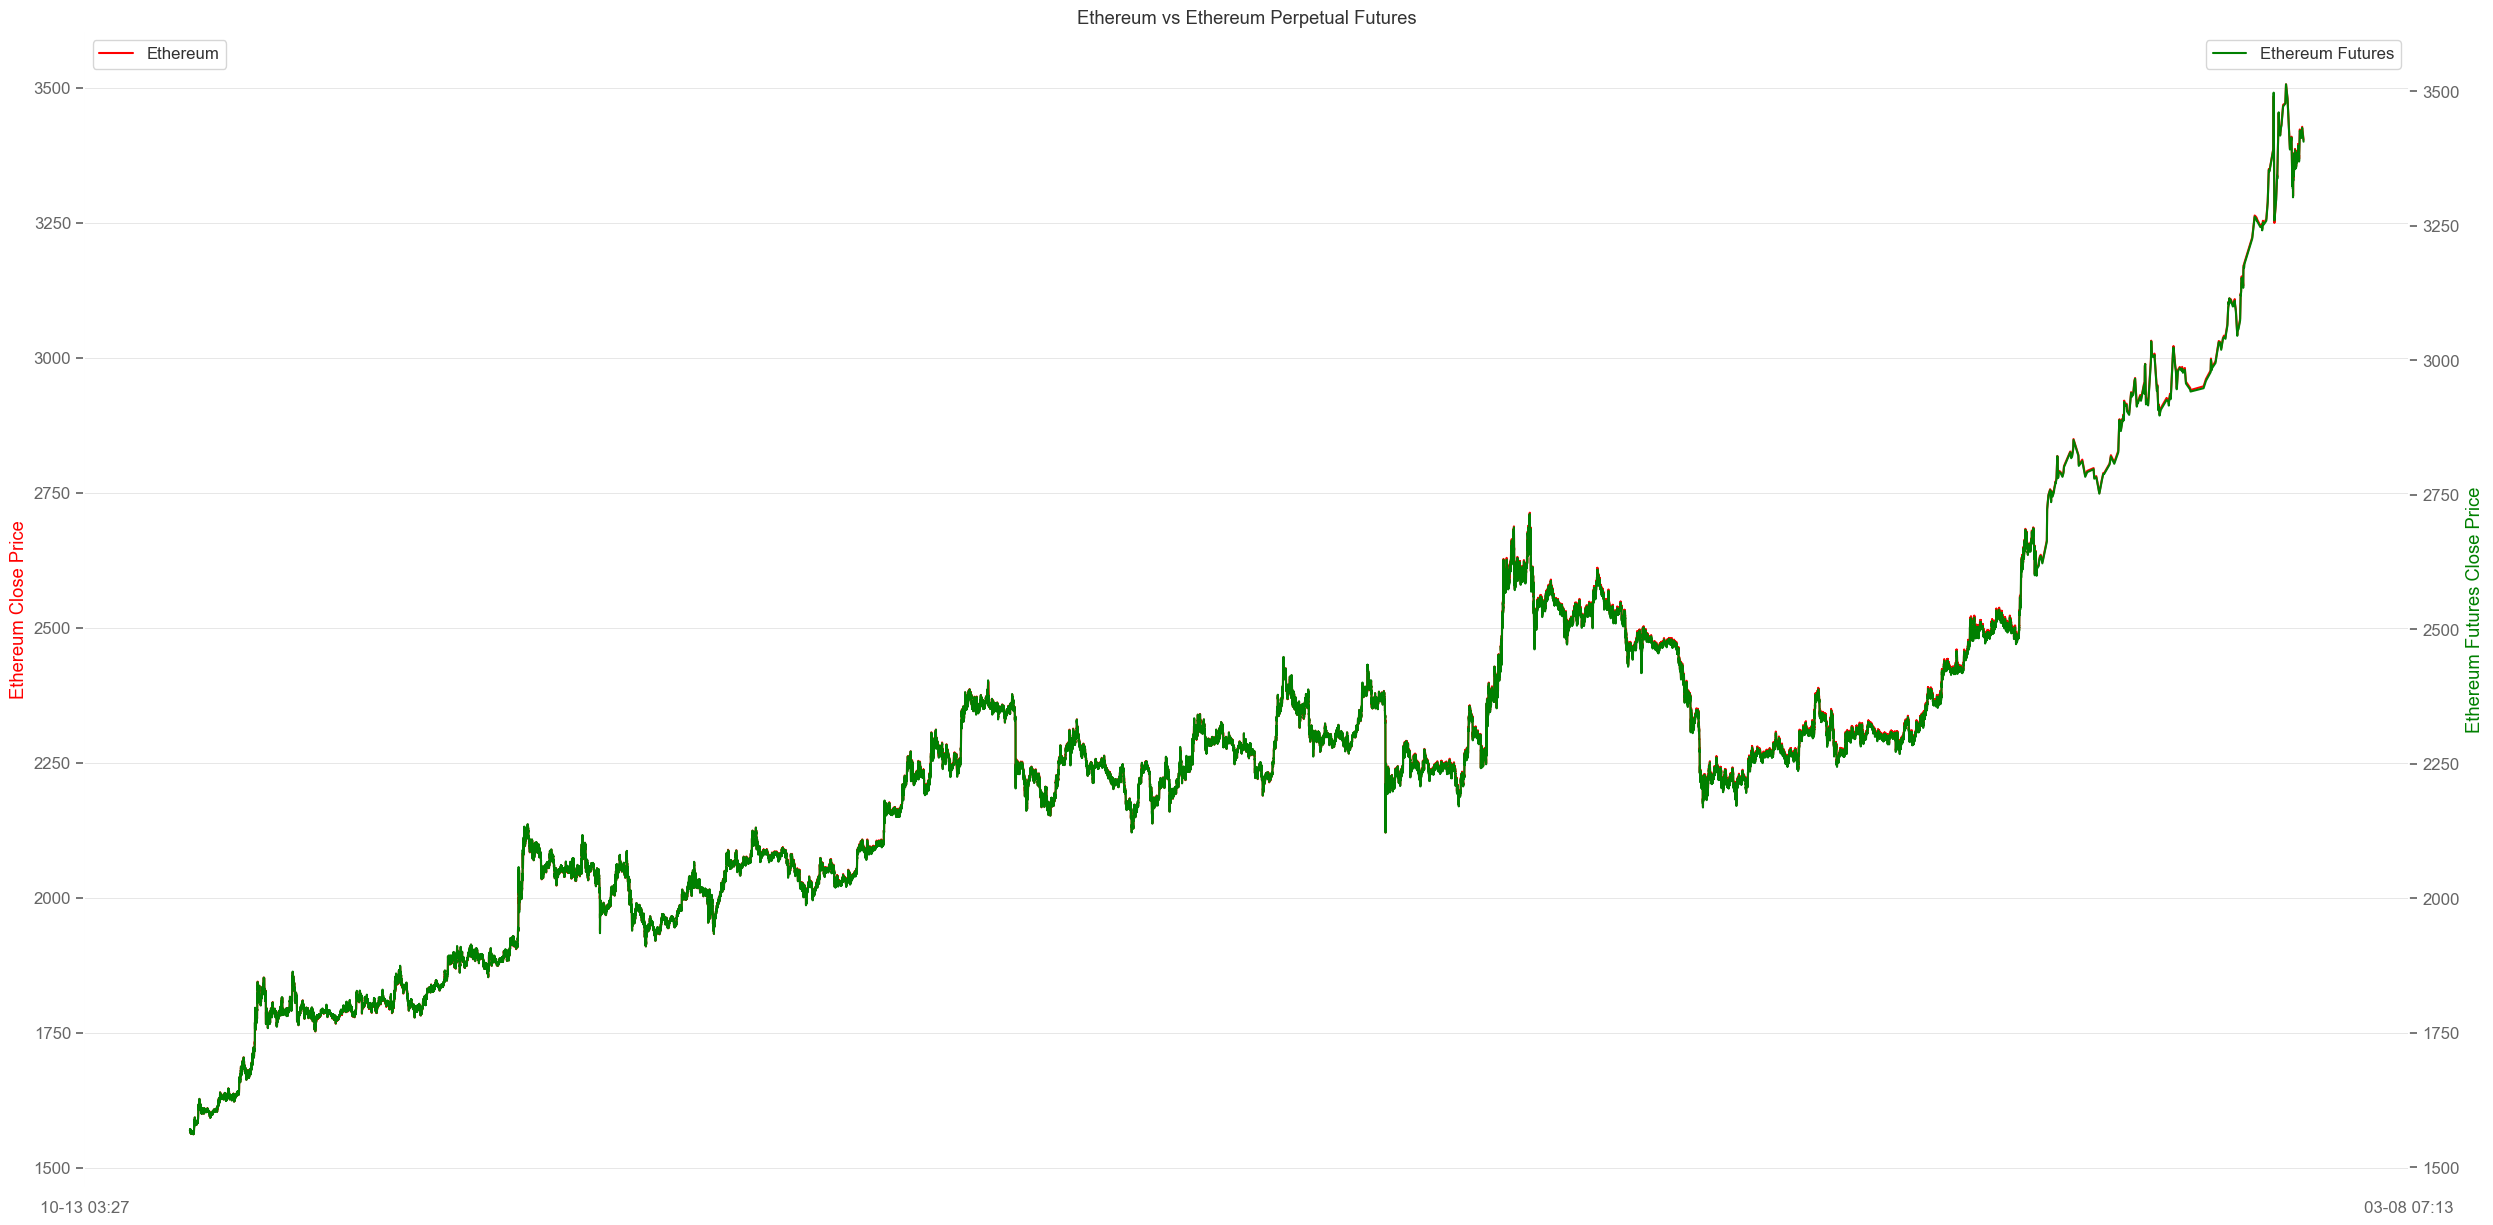

In [12]:

# Extract relevant columns (timestamp and close price)
df1 = df_eth[['timestamp', 'close']]
df2 = df_eth_perp[['timestamp', 'close']]

# Merge datasets on timestamp
merged_df_eth_close = pd.merge(df1, df2, on='timestamp', suffixes=('_bitcoin', '_futures'))

# Plot Market Data
fig, ax = plt.subplots(figsize=(30, 15))

# Plot Bitcoin close price
ax.plot(merged_df_eth_close['timestamp'], merged_df_eth_close['close_bitcoin'], color='red', label='Ethereum')

# Create a second y-axis
ax1 = ax.twinx()

# Plot Bitcoin Perpetual Futures close price on the second axis
ax1.plot(merged_df_eth_close['timestamp'], merged_df_eth_close['close_futures'], color='green', label='Ethereum Futures')

# Format x-axis labels
date_format = DateFormatter('%m-%d %H:%M')
ax.xaxis.set_major_formatter(date_format)
ax.xaxis.set_major_locator(HourLocator(interval=10000))  # Adjust the interval as needed

# Set labels and title
ax.set_ylabel('Ethereum Close Price', color='red')
ax1.set_ylabel('Ethereum Futures Close Price', color='green')
plt.title('Ethereum vs Ethereum Perpetual Futures')

# Display a legend
ax.legend(loc='upper left')
ax1.legend(loc='upper right')

plt.xticks(rotation=45, ha='right')
plt.grid()
plt.show()


### Plotting Ethereum and Ethereum perpetual futures - SPREAD

(array([19643.14440972, 19790.30072917]),
 [Text(19643.144409722223, 0, '10-13 03'),
  Text(19790.300729166665, 0, '03-08 07')])

Text(0, 0.5, 'Spread (Ethereum - Futures)')

Text(0.5, 1.0, 'Ethereum vs Ethereum Perpetual Futures Spread')

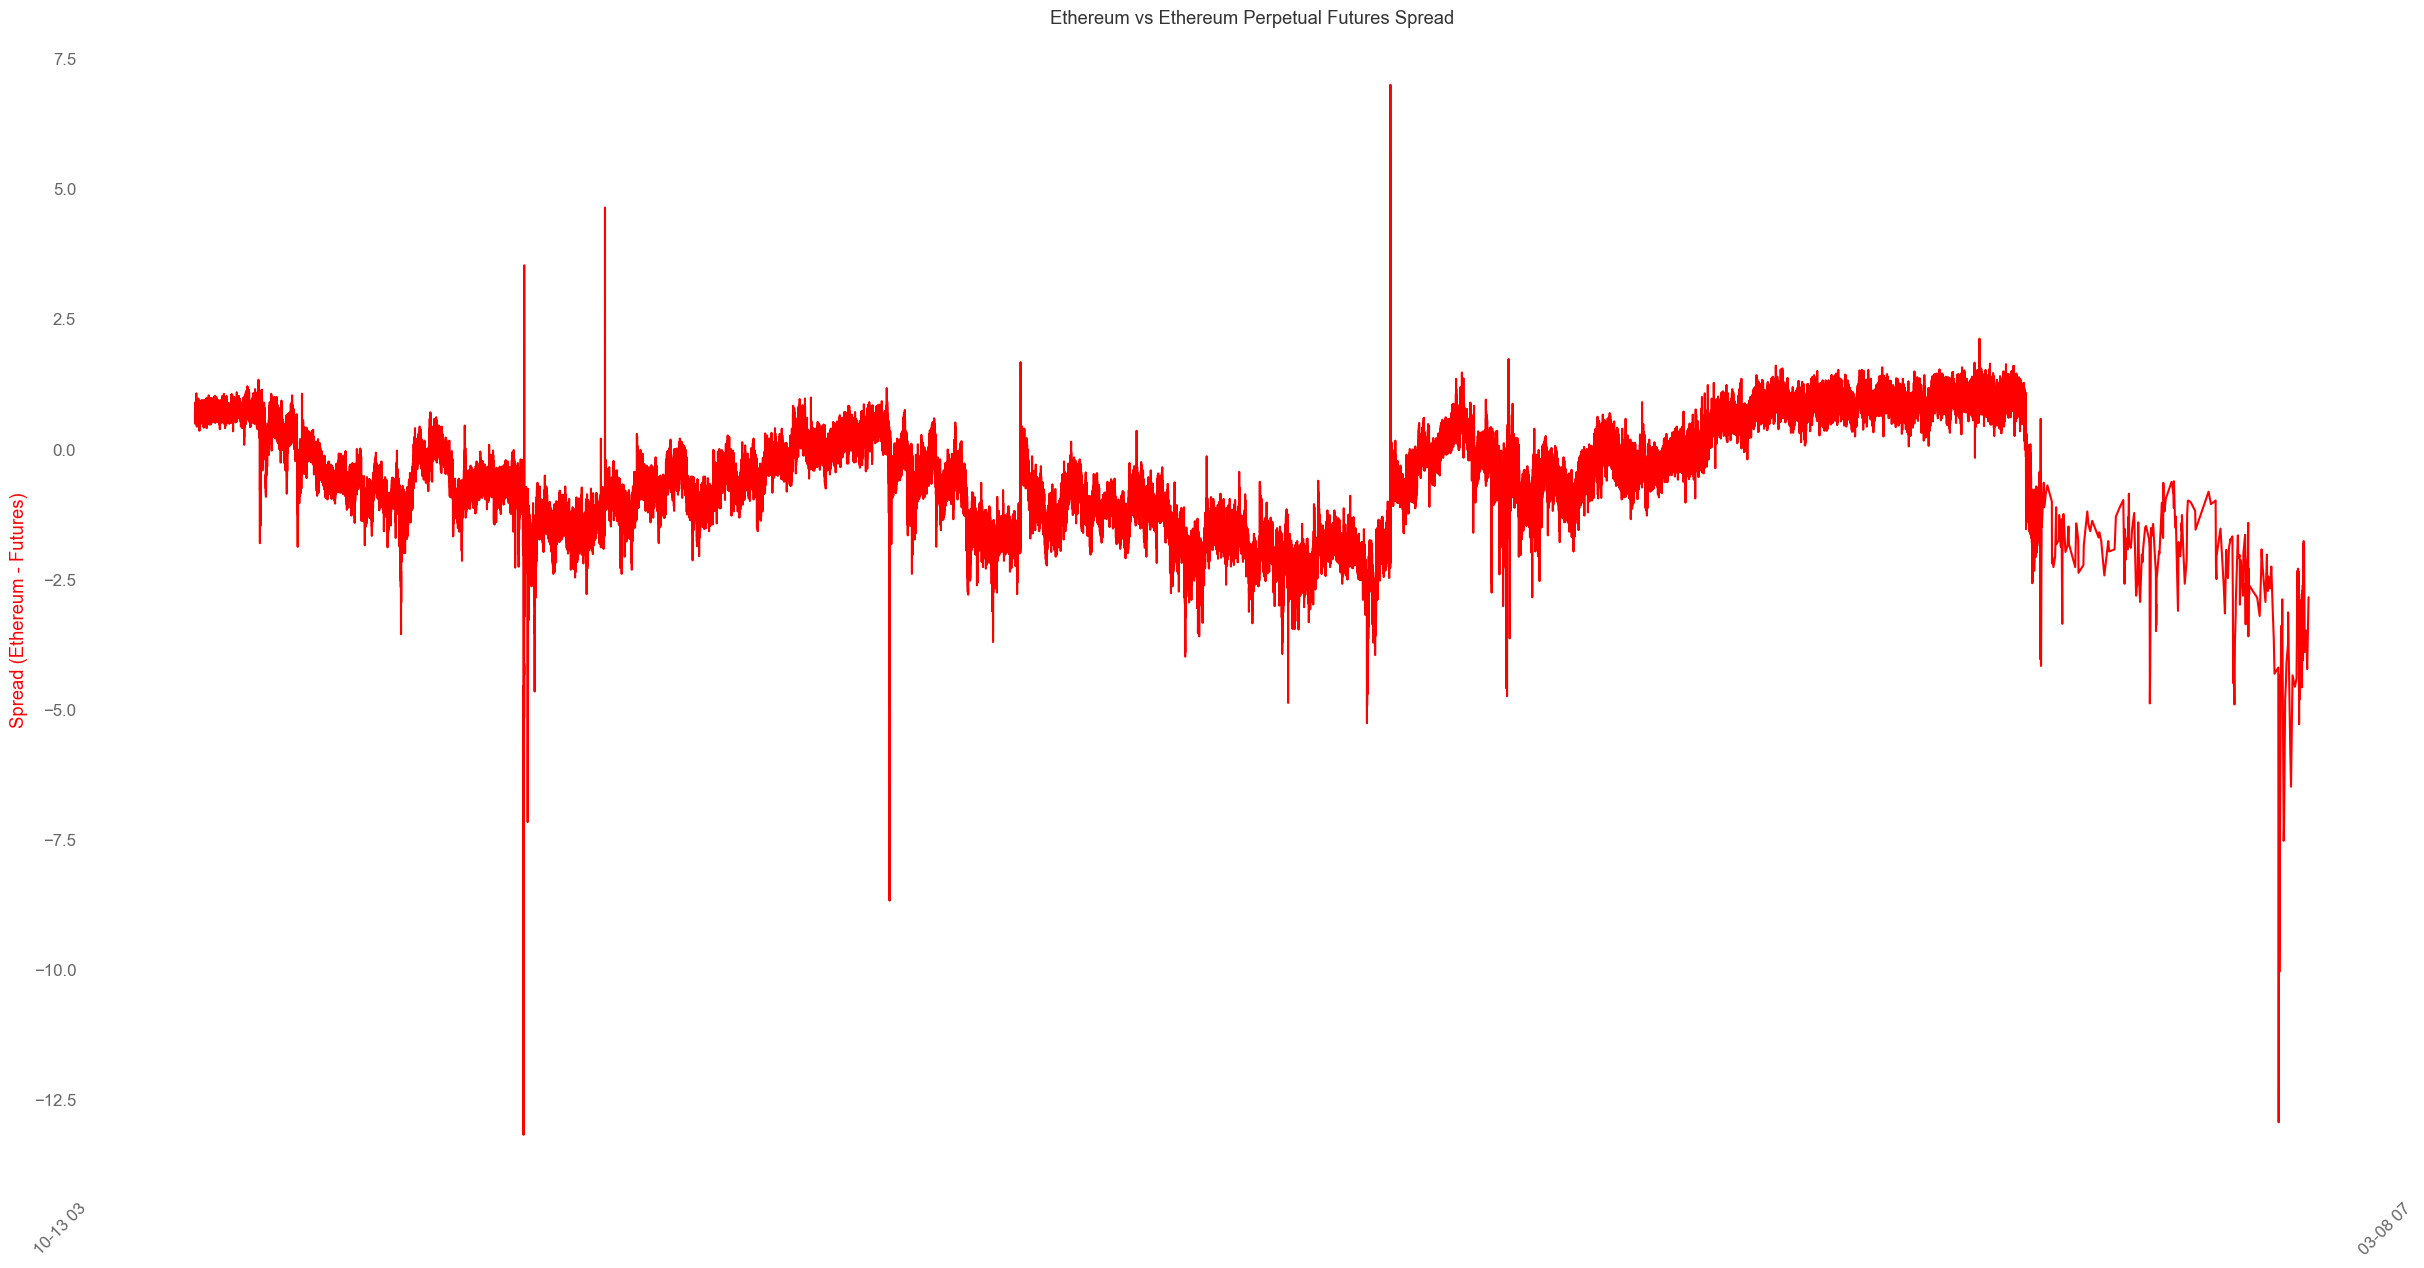

In [13]:
# Extract relevant columns (timestamp and close price)
df1 = df_eth[['timestamp', 'close']]
df2 = df_eth_perp[['timestamp', 'close']]

# Merge datasets on timestamp
merged_df_eth_spread = pd.merge(df1, df2, on='timestamp', suffixes=('_eth', '_futuresETH'))

# Calculate spread (difference between bitcoin and futures close prices)
merged_df_eth_spread['eth_spread'] = merged_df_eth_spread['close_eth'] - merged_df_eth_spread['close_futuresETH']

# Plot Market Data
fig, ax = plt.subplots(figsize=(30,15))
ax.plot(merged_df_eth_spread['timestamp'], merged_df_eth_spread['eth_spread'], color='red')
#ax.xaxis.set_major_formatter(date_format)
ax.xaxis.set_major_locator(HourLocator(interval=10000))  # Adjust the interval as needed
plt.xticks(rotation=45, ha='right')
plt.ylabel('Spread (Ethereum - Futures)', color='red')
plt.grid()
plt.title('Ethereum vs Ethereum Perpetual Futures Spread')
plt.show()

### Test for Stationarity - BTC Spread

In [14]:
# Method to Print Stationarity Result --> BTC
def is_stationary(p_value):
    if (p_value<0.05):
        print(f'Series is Stationary (p-value {p_value*100:.4f}%)')
    else:
        print(f'Series NOT Stationary (p-value {p_value*100:.4f}%)')
    return

In [15]:
# Assuming 'spread' is the column you want to test for stationarity
spread_series_btc_spread = merged_df_btc_spread['spread']

# Test the Spread for Stationarity using ADF
adf = adfuller(spread_series_btc_spread, maxlag=1)

# Extract relevant information from the ADF result
test_statistic = adf[0]
p_value = adf[1]
critical_value = adf[4]['5%']

# Print ADF Results
print(f'BTC --> ADF Result Parameters \n{adf}\n')

# Print Test Statistic
print(f'Test Statistic: {test_statistic:.4f}')

# Print Critical Value
print(f'Critical Value: {critical_value:.4f}')

# Print P-Value
print(f'P-Value: {p_value:.4f}')

# Display Stationarity Result - BTC Spread
is_stationary(p_value)


BTC --> ADF Result Parameters 
(-63.973961042637264, 0.0, 1, 122969, {'1%': -3.4304031795534744, '5%': -2.861563504577854, '10%': -2.566782510655882}, 2149813.998443306)

Test Statistic: -63.9740
Critical Value: -2.8616
P-Value: 0.0000
Series is Stationary (p-value 0.0000%)


### Test for Stationarity - ETH Spread

In [16]:
# Assuming 'spread' is the column you want to test for stationarity
spread_series_eth_spread = merged_df_eth_spread['eth_spread']

# Test the Spread for Stationarity using ADF
adf = adfuller(spread_series_eth_spread, maxlag=1)

# Extract relevant information from the ADF result
test_statistic = adf[0]
p_value = adf[1]
critical_value = adf[4]['5%']

# Print ADF Results
print(f'ETH --> ADF Result Parameters \n{adf}\n')

# Print Test Statistic
print(f'Test Statistic: {test_statistic:.4f}')

# Print Critical Value
print(f'Critical Value: {critical_value:.4f}')

# Print P-Value
print(f'P-Value: {p_value:.4f}')

# Display Stationarity Result - ETH Spread
is_stationary(p_value)



ETH --> ADF Result Parameters 
(-25.644170310328114, 0.0, 1, 125738, {'1%': -3.4304020084103835, '5%': -2.8615629869544272, '10%': -2.56678223514244}, -42150.71602959299)

Test Statistic: -25.6442
Critical Value: -2.8616
P-Value: 0.0000
Series is Stationary (p-value 0.0000%)


### Z-score computation - BTC Spread

In [17]:
# Compute Mean and Std using window specified
window = 30
merged_df_btc_spread['mean'] = merged_df_btc_spread['spread'].ewm(span=window).mean()
merged_df_btc_spread['std'] = merged_df_btc_spread['spread'].ewm(span=window).std()
# Drop NaN Values
merged_df_btc_spread.dropna(inplace=True)
# Compute the Z-Score
merged_df_btc_spread['z_score'] = ( merged_df_btc_spread['spread'] - merged_df_btc_spread['mean'] ) / merged_df_btc_spread['std']
# Z-Score Boundaries
merged_df_btc_spread['z_up'] = 2.0
merged_df_btc_spread['z_down'] = -2.0

### Z-score computation - ETH Spread

In [18]:
# Compute Mean and Std using window specified
window = 30
merged_df_eth_spread['mean'] = merged_df_eth_spread['eth_spread'].ewm(span=window).mean()
merged_df_eth_spread['std'] = merged_df_eth_spread['eth_spread'].ewm(span=window).std()
# Drop NaN Values
merged_df_eth_spread.dropna(inplace=True)
# Compute the Z-Score
merged_df_eth_spread['z_score'] = ( merged_df_eth_spread['eth_spread'] - merged_df_eth_spread['mean'] ) / merged_df_eth_spread['std']
# Z-Score Boundaries
merged_df_eth_spread['z_up'] = 2.0
merged_df_eth_spread['z_down'] = -2.0

### Trading Signals - BTC

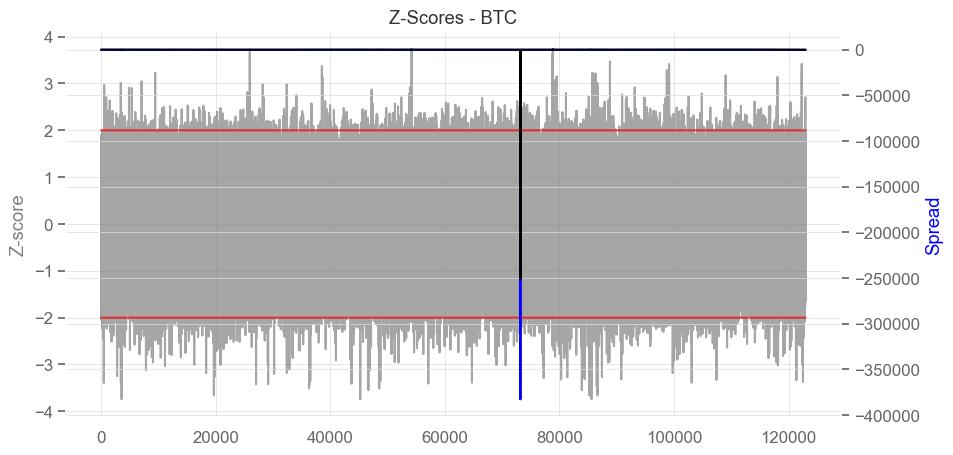

In [19]:
# Long Trading Signals
long_entry = (merged_df_btc_spread['z_score'] <= merged_df_btc_spread['z_down'])
long_exit = (merged_df_btc_spread['z_score'] >= 0)
# Initialize Long Position Column to NaN
merged_df_btc_spread['long_pos'] = np.nan
# Apply Long Trading Signals
merged_df_btc_spread.loc[long_entry, 'long_pos'] = 1
merged_df_btc_spread.loc[long_exit, 'long_pos'] = 0
# Forward Fill NaN Values
merged_df_btc_spread['long_pos'].fillna(method='ffill', inplace=True)
# Fill any remaining NaN values wth Zero
merged_df_btc_spread['long_pos'].fillna(0, inplace=True)

# Short Trading Signals
short_entry = (merged_df_btc_spread['z_score'] >= merged_df_btc_spread['z_up'])
short_exit = (merged_df_btc_spread['z_score'] <= 0)
# Initialize Short Position Column to NaN
merged_df_btc_spread['short_pos'] = np.nan
# Apply Long Trading Signals
merged_df_btc_spread.loc[short_entry, 'short_pos'] = -1
merged_df_btc_spread.loc[short_exit, 'short_pos'] = 0
# Forward Fill NaN Values
merged_df_btc_spread['short_pos'].fillna(method='ffill', inplace=True)
# Fill any remaining NaN values wth Zero
merged_df_btc_spread['short_pos'].fillna(0, inplace=True)

# Total Trading Position
merged_df_btc_spread['total_pos'] = merged_df_btc_spread['long_pos'] + merged_df_btc_spread['short_pos']

# Plot the Z-Scores
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(merged_df_btc_spread.index, merged_df_btc_spread['z_score'], color='grey', alpha=0.7)
ax.plot(merged_df_btc_spread.index, merged_df_btc_spread['z_up'], color='red', alpha=0.7)
ax.plot(merged_df_btc_spread.index, merged_df_btc_spread['z_down'], color='red', alpha=0.7)
ax.set_ylabel('Z-score', color='grey')
ax1 = ax.twinx()
ax1.plot(merged_df_btc_spread.index, merged_df_btc_spread['spread'], color='blue')
ax1.plot(merged_df_btc_spread.index, merged_df_btc_spread['mean'], color='black')
ax1.set_ylabel('Spread', color='blue')
plt.title('Z-Scores - BTC')
plt.show();

### Trading Signals - ETH

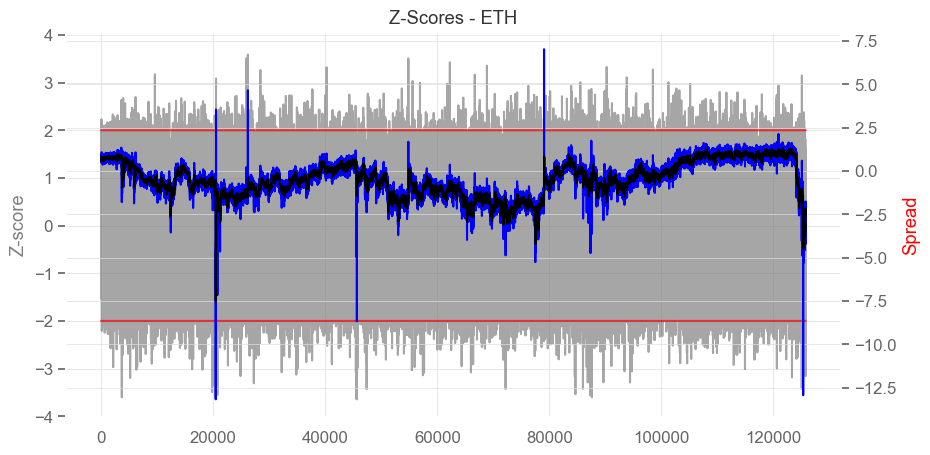

In [20]:
# Long Trading Signals
long_entry = (merged_df_eth_spread['z_score'] <= merged_df_eth_spread['z_down'])
long_exit = (merged_df_eth_spread['z_score'] >= 0)
# Initialize Long Position Column to NaN
merged_df_eth_spread['long_pos'] = np.nan
# Apply Long Trading Signals
merged_df_eth_spread.loc[long_entry, 'long_pos'] = 1
merged_df_eth_spread.loc[long_exit, 'long_pos'] = 0
# Forward Fill NaN Values
merged_df_eth_spread['long_pos'].fillna(method='ffill', inplace=True)
# Fill any remaining NaN values wth Zero
merged_df_eth_spread['long_pos'].fillna(0, inplace=True)

# Short Trading Signals
short_entry = (merged_df_eth_spread['z_score'] >= merged_df_eth_spread['z_up'])
short_exit = (merged_df_eth_spread['z_score'] <= 0)
# Initialize Short Position Column to NaN
merged_df_eth_spread['short_pos'] = np.nan
# Apply Long Trading Signals
merged_df_eth_spread.loc[short_entry, 'short_pos'] = -1
merged_df_eth_spread.loc[short_exit, 'short_pos'] = 0
# Forward Fill NaN Values
merged_df_eth_spread['short_pos'].fillna(method='ffill', inplace=True)
# Fill any remaining NaN values wth Zero
merged_df_eth_spread['short_pos'].fillna(0, inplace=True)

# Total Trading Position
merged_df_eth_spread['total_pos'] = merged_df_eth_spread['long_pos'] + merged_df_eth_spread['short_pos']

# Plot the Z-Scores
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(merged_df_eth_spread.index, merged_df_eth_spread['z_score'], color='grey', alpha=0.7)
ax.plot(merged_df_eth_spread.index, merged_df_eth_spread['z_up'], color='red', alpha=0.7)
ax.plot(merged_df_eth_spread.index, merged_df_eth_spread['z_down'], color='red', alpha=0.7)
ax.set_ylabel('Z-score', color='grey')
ax1 = ax.twinx()
ax1.plot(merged_df_eth_spread.index, merged_df_eth_spread['eth_spread'], color='blue')
ax1.plot(merged_df_eth_spread.index, merged_df_eth_spread['mean'], color='black')
ax1.set_ylabel('Spread', color='red')
plt.title('Z-Scores - ETH')
plt.show();

### Plot Trading Positions - BTC

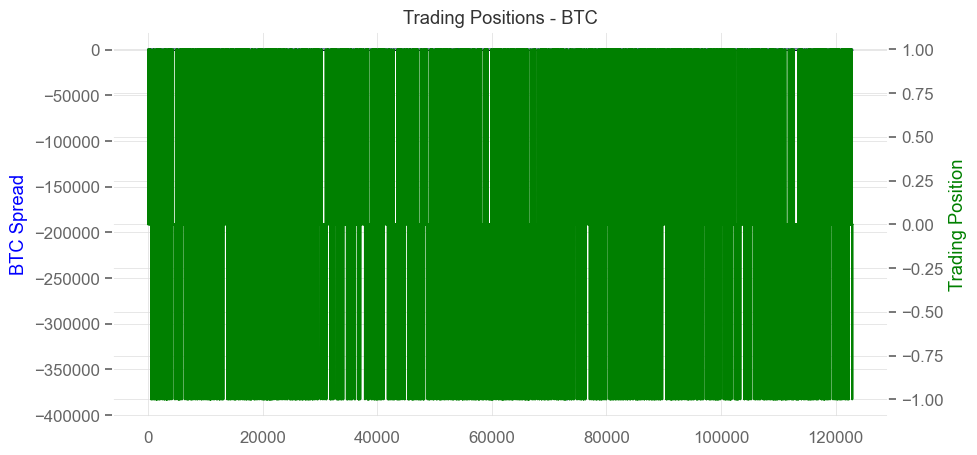

In [21]:
fig, ax = plt.subplots(figsize=(10,5))
plt.plot(merged_df_btc_spread.index, merged_df_btc_spread['spread'], color='blue')
plt.plot(merged_df_btc_spread.index, merged_df_btc_spread['mean'], color='black')
plt.ylabel('BTC Spread', color='blue')
ax1 = ax.twinx()
ax1.plot(merged_df_btc_spread.index, merged_df_btc_spread['total_pos'], color='green')
ax1.set_ylabel('Trading Position', color='green')
plt.title('Trading Positions - BTC')
plt.show();

### Plot Trading Positions - ETH

ValueError: x and y must have same first dimension, but have shapes (122970,) and (125739,)

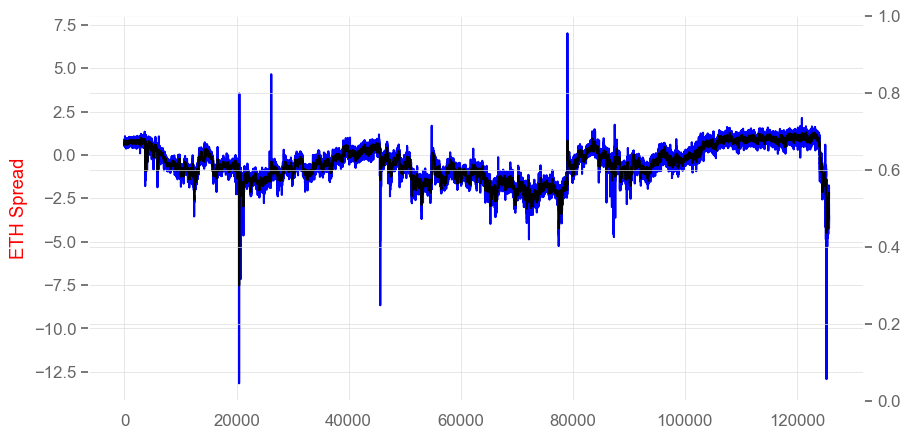

In [22]:
fig, ax = plt.subplots(figsize=(10,5))
plt.plot(merged_df_eth_spread.index, merged_df_eth_spread['eth_spread'], color='blue')
plt.plot(merged_df_eth_spread.index, merged_df_eth_spread['mean'], color='black')
plt.ylabel('ETH Spread', color='red')
ax1 = ax.twinx()
ax1.plot(merged_df_btc_spread.index, merged_df_eth_spread['total_pos'], color='green')
ax1.set_ylabel('Trading Position', color='green')
plt.title('Trading Positions - ETH')
plt.show();

### Performance - BTC Strategy

In [ ]:
risk_free_rate = 0.05 # assume 5.0% per year

In [ ]:
# Also Compute the Spread Log Return
merged_df_btc_spread['log_return'] = np.log(merged_df_btc_spread['spread']/merged_df_btc_spread['spread'].shift(1))
# Compute Strategy Returns - Shift Position by 1 Day to mitigate look-ah
merged_df_btc_spread['strategy_returns'] = merged_df_btc_spread['total_pos'].shift(1) * merged_df_btc_spread['log_return']
strategy_mean = merged_df_btc_spread['strategy_returns'].mean()
strategy_std = merged_df_btc_spread['strategy_returns'].std()

# Compute the Sharpe Ratio
# Daily Sharpe Ratio
# Note: we convert risk-free rate to a daily rate i.e. divide by 252
sharpe_daily = (strategy_mean - (risk_free_rate/252) ) / strategy_std
print(f'BTC - Daily Sharpe Ratio: {sharpe_daily:.4f}')
# Annualized Sharpe Ratio
# Scale daily by t/sqrt(t) = sqrt(t) i.e. sqrt(252)
sharpe_annual = sharpe_daily * np.sqrt(252)
print(f'BTC - Annual Sharpe Ratio: {sharpe_annual:.4f}')

BTC - Daily Sharpe Ratio: nan
BTC - Annual Sharpe Ratio: nan


In [ ]:
# Also Compute the Spread Log Return
merged_df_eth_spread['log_return'] = np.log(merged_df_eth_spread['eth_spread']/merged_df_eth_spread['eth_spread'].shift(1))
# Compute Strategy Returns - Shift Position by 1 Day to mitigate look-ah
merged_df_eth_spread['strategy_returns'] = merged_df_eth_spread['total_pos'].shift(1) * merged_df_eth_spread['log_return']
strategy_mean = merged_df_eth_spread['strategy_returns'].mean()
strategy_std = merged_df_eth_spread['strategy_returns'].std()

# Daily Sharpe Ratio
# Note: we convert risk-free rate to a daily rate i.e. divide by 252
sharpe_daily = (strategy_mean - (risk_free_rate/252) ) / strategy_std
print(f'ETH - Daily Sharpe Ratio: {sharpe_daily:.4f}')
# Annualized Sharpe Ratio
# Scale daily by t/sqrt(t) = sqrt(t) i.e. sqrt(252)
sharpe_annual = sharpe_daily * np.sqrt(252)
print(f'ETH - Annual Sharpe Ratio: {sharpe_annual:.4f}')

ETH - Daily Sharpe Ratio: nan
ETH - Annual Sharpe Ratio: nan


In [ ]:
# QuantStats Performance Metric - BTC
qs.reports.basic(merged_df_btc_spread['strategy_returns'], rf = risk_free_rate)

AttributeError: 'Index' object has no attribute 'tz_localize'

In [ ]:
# QuantStats Performance Metric - ETH
qs.reports.basic(merged_df_eth_spread['strategy_returns'], rf = risk_free_rate)

AttributeError: 'Index' object has no attribute 'tz_localize'